# Page View Time Series Visualizer

## Preview

![line_plot](line_plot.png)
![bar_plot](bar_plot.png)
![box_plot](box_plot.png)

## Process

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


### Data preparation

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the `date`column.

In [2]:
register_matplotlib_converters()

df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=["date"],index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Data cleaning: Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
df = df[
    (df.value <= df.value.quantile(0.975)) &
    (df.value >= df.value.quantile(0.025))
    ]

### 1. Line plot

Usea Matplotlib to draw a line chart. The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.

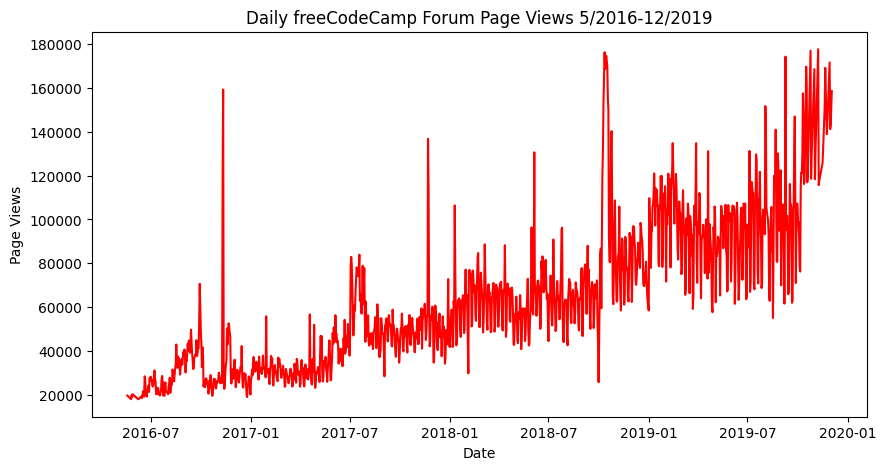

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['value'],color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

### 2. Bar plot

Use Matplotlib to draw a bar chart. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of `Months`. On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.

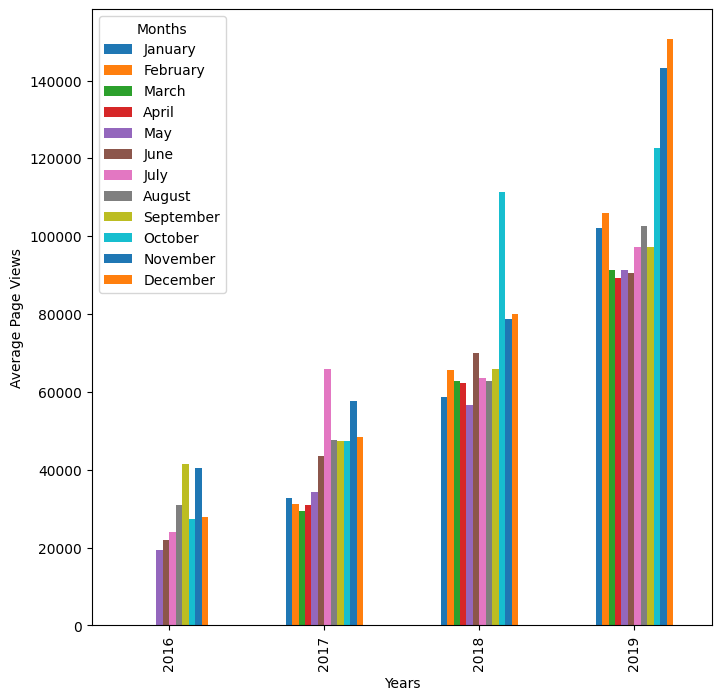

In [5]:
df['year'] = df.index.year
df['month'] = df.index.month

groupped_df = df.groupby(['year','month'])['value'].mean().reset_index()

pivot_index_is_year = groupped_df.pivot(index='year',columns='month',values='value')
fig = pivot_index_is_year.plot(kind="bar",xlabel="Years",ylabel="Average Page Views",figsize=(8,8))
fig.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],title="Months")
plt.show()


### 3. Box plot

 Use Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`.

Prepare data for box plots

In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.month for d in df_box.date]
df_box.sort_values(by=["month"])
df_box

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5
...,...,...,...,...
1233,2019-11-24,138875,2019,11
1234,2019-11-29,171584,2019,11
1235,2019-11-30,141161,2019,11
1236,2019-12-01,142918,2019,12


Draw box plots (using Seaborn)

C:\Users\por\AppData\Local\Temp\ipykernel_19184\3281304462.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


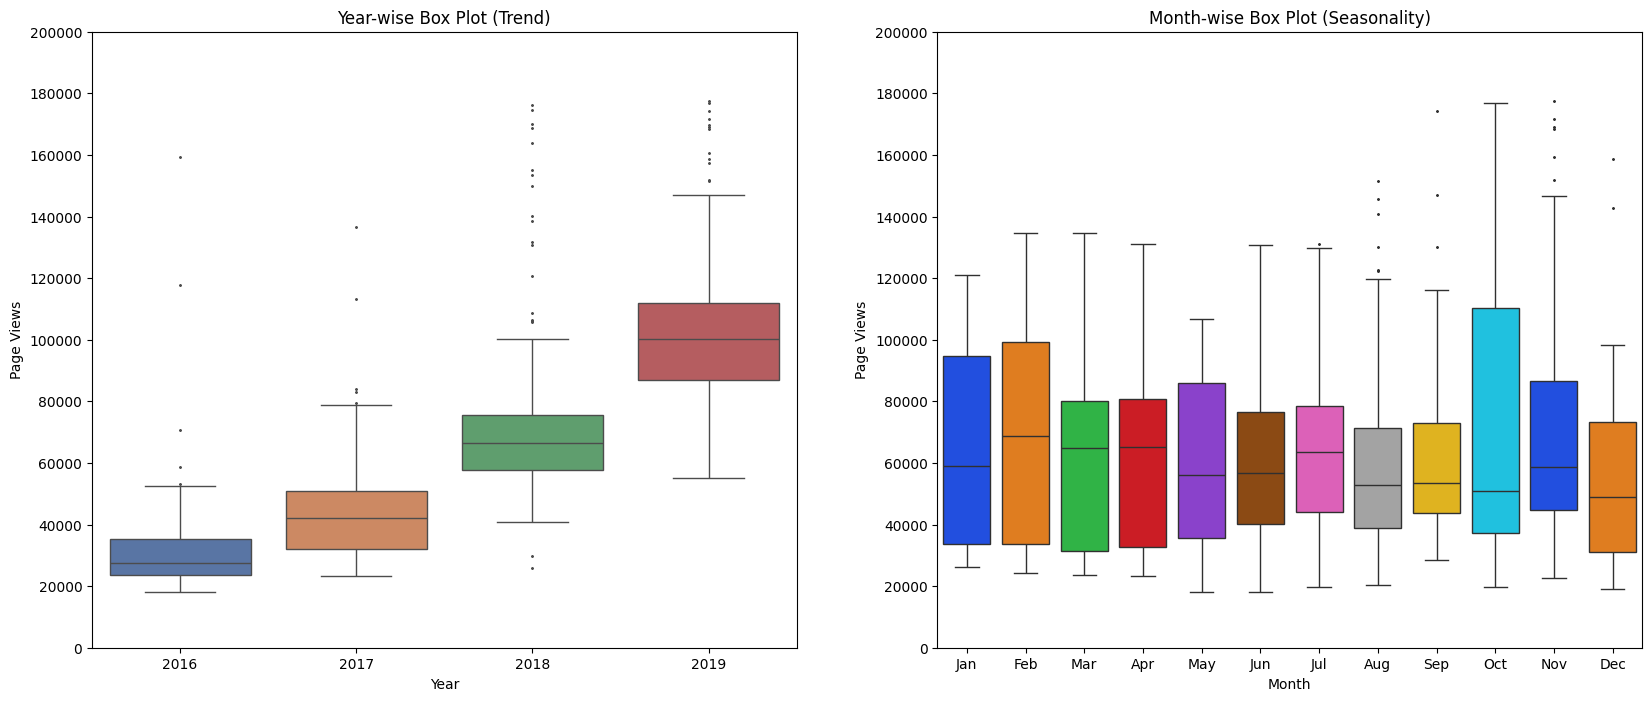

In [7]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
tick = [i for i in range(0,200001,20000)]
for a in ax:
    a.set_yticks(tick)
    a.set_ylim(0,200000)
    a.set_ylabel("Page Views")

ax[0].set_title("Year-wise Box Plot (Trend)")
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[0].set_xlabel("Year")
ax[1].set_xlabel("Month")
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

sns.boxplot(
    x='year',
    y='value',
    data=df_box,
    hue='year',
    ax=ax[0],
    palette="deep",
    flierprops=dict(marker='D', markersize=1),
    legend=False,
    
)
sns.boxplot(
    x='month',
    y='value',
    data=df_box,
    hue='month',
    ax=ax[1],
    palette="bright",
    flierprops=dict(marker='D', markersize=1),
    legend=False
)
plt.show()
